## Importing Libraries

In [1]:
import numpy as np
import pandas as pd  
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from keras import Sequential 
from keras.layers import Dense 
from keras.regularizers import L1,L2,L1L2 
from keras.optimizers import SGD  
import matplotlib.pyplot as plt 
import seaborn as sns  

## Importing the CSV file 

In [3]:
df=pd.read_csv(r"C:\Users\hp\Downloads\ASSIGNMENT_4\ASSIGNMENT_4\Multiple CSV\8.twospirals.csv",header=None) 
df.head()  

,0,1,2
0,-2.543456,-10.816358,0
1,9.434466,-2.572000,0
2,3.368646,-10.194671,0
3,1.341407,-4.204140,0
4,9.547758,-2.220580,0


In [4]:
df.info()  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       2000 non-null   float64
 1   1       2000 non-null   float64
 2   2       2000 non-null   int64  
dtypes: float64(2), int64(1)
memory usage: 47.0 KB


## checking outliers

In [5]:
df[2].value_counts() 

0    1000
1    1000
Name: 2, dtype: int64

C:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='0'>

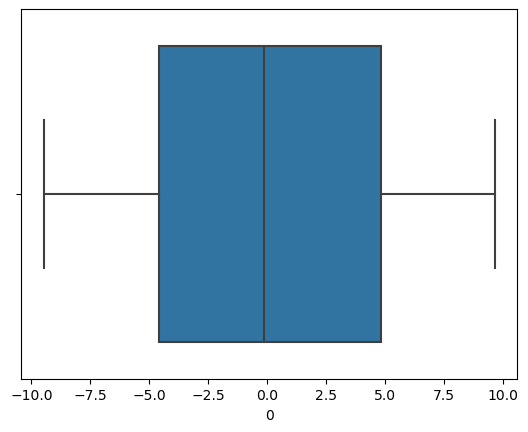

In [6]:
sns.boxplot(df[0])  

C:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='1'>

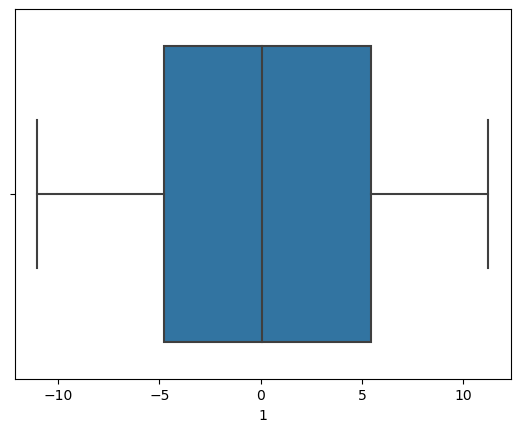

In [7]:
sns.boxplot(df[1])  

## splitting the data into input and output features

In [8]:
x=df[[0,1]] 
y=df[2].astype(int) 

In [9]:
x.head()  

,0,1
0,-2.543456,-10.816358
1,9.434466,-2.572000
2,3.368646,-10.194671
3,1.341407,-4.204140
4,9.547758,-2.220580


In [10]:
y.head() 

0    0
1    0
2    0
3    0
4    0
Name: 2, dtype: int32

## Split the data into train and test

In [11]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)   

In [12]:
x_train.shape 

(1600, 2)

In [13]:
x_test.shape  

(400, 2)

## Standardising input features

In [14]:
std=StandardScaler()
x_train=std.fit_transform(x_train)
x_test=std.transform(x_test)  

## Build the Logical Structure 

In [15]:
model=Sequential()
model.add(Dense(16,activation="relu",input_dim=2))
model.add(Dense(10,activation="relu"))
model.add(Dense(6,activation="relu"))
model.add(Dense(1,activation="sigmoid")) 

In [16]:
model.summary()  

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                48        
                                                                 
 dense_1 (Dense)             (None, 10)                170       
                                                                 
 dense_2 (Dense)             (None, 6)                 66        
                                                                 
 dense_3 (Dense)             (None, 1)                 7         
                                                                 
Total params: 291 (1.14 KB)
Trainable params: 291 (1.14 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [17]:
model.compile(loss="binary_crossentropy",optimizer=SGD(0.01),metrics=["accuracy"])
history=model.fit(x_train,y_train,batch_size=50,epochs=500,validation_split=0.1)  

Epoch 1/500
29/29 [==============================] - 1s 15ms/step - loss: 0.6837 - accuracy: 0.5285 - val_loss: 0.6840 - val_accuracy: 0.4812
Epoch 2/500
29/29 [==============================] - 0s 5ms/step - loss: 0.6804 - accuracy: 0.5410 - val_loss: 0.6818 - val_accuracy: 0.5000
Epoch 3/500
29/29 [==============================] - 0s 5ms/step - loss: 0.6773 - accuracy: 0.5590 - val_loss: 0.6798 - val_accuracy: 0.4875
Epoch 4/500
29/29 [==============================] - 0s 5ms/step - loss: 0.6745 - accuracy: 0.5632 - val_loss: 0.6780 - val_accuracy: 0.5000
Epoch 5/500
29/29 [==============================] - 0s 5ms/step - loss: 0.6718 - accuracy: 0.5590 - val_loss: 0.6763 - val_accuracy: 0.5312
Epoch 6/500
29/29 [==============================] - 0s 5ms/step - loss: 0.6692 - accuracy: 0.5750 - val_loss: 0.6745 - val_accuracy: 0.5188
Epoch 7/500
29/29 [==============================] - 0s 5ms/step - loss: 0.6666 - accuracy: 0.5931 - val_loss: 0.6729 - val_accuracy: 0.5375
Epoch 8/500


Epoch 59/500
29/29 [==============================] - 0s 5ms/step - loss: 0.6196 - accuracy: 0.6410 - val_loss: 0.6556 - val_accuracy: 0.6000
Epoch 60/500
29/29 [==============================] - 0s 5ms/step - loss: 0.6193 - accuracy: 0.6403 - val_loss: 0.6557 - val_accuracy: 0.6000
Epoch 61/500
29/29 [==============================] - 0s 6ms/step - loss: 0.6191 - accuracy: 0.6410 - val_loss: 0.6558 - val_accuracy: 0.5938
Epoch 62/500
29/29 [==============================] - 0s 6ms/step - loss: 0.6187 - accuracy: 0.6417 - val_loss: 0.6558 - val_accuracy: 0.5938
Epoch 63/500
29/29 [==============================] - 0s 6ms/step - loss: 0.6185 - accuracy: 0.6403 - val_loss: 0.6558 - val_accuracy: 0.5938
Epoch 64/500
29/29 [==============================] - 0s 6ms/step - loss: 0.6182 - accuracy: 0.6396 - val_loss: 0.6557 - val_accuracy: 0.5938
Epoch 65/500
29/29 [==============================] - 0s 6ms/step - loss: 0.6180 - accuracy: 0.6403 - val_loss: 0.6557 - val_accuracy: 0.5938
Epoch 

29/29 [==============================] - 0s 5ms/step - loss: 0.6064 - accuracy: 0.6111 - val_loss: 0.6514 - val_accuracy: 0.5562
Epoch 117/500
29/29 [==============================] - 0s 5ms/step - loss: 0.6062 - accuracy: 0.6062 - val_loss: 0.6515 - val_accuracy: 0.5562
Epoch 118/500
29/29 [==============================] - 0s 5ms/step - loss: 0.6059 - accuracy: 0.6076 - val_loss: 0.6512 - val_accuracy: 0.5500
Epoch 119/500
29/29 [==============================] - 0s 5ms/step - loss: 0.6057 - accuracy: 0.6062 - val_loss: 0.6511 - val_accuracy: 0.5500
Epoch 120/500
29/29 [==============================] - 0s 5ms/step - loss: 0.6054 - accuracy: 0.6076 - val_loss: 0.6511 - val_accuracy: 0.5500
Epoch 121/500
29/29 [==============================] - 0s 5ms/step - loss: 0.6051 - accuracy: 0.6062 - val_loss: 0.6509 - val_accuracy: 0.5500
Epoch 122/500
29/29 [==============================] - 0s 6ms/step - loss: 0.6049 - accuracy: 0.6056 - val_loss: 0.6505 - val_accuracy: 0.5500
Epoch 123/500

29/29 [==============================] - 0s 5ms/step - loss: 0.5695 - accuracy: 0.6069 - val_loss: 0.6234 - val_accuracy: 0.5500
Epoch 174/500
29/29 [==============================] - 0s 5ms/step - loss: 0.5684 - accuracy: 0.6076 - val_loss: 0.6223 - val_accuracy: 0.5500
Epoch 175/500
29/29 [==============================] - 0s 5ms/step - loss: 0.5674 - accuracy: 0.6076 - val_loss: 0.6217 - val_accuracy: 0.5500
Epoch 176/500
29/29 [==============================] - 0s 5ms/step - loss: 0.5665 - accuracy: 0.6056 - val_loss: 0.6207 - val_accuracy: 0.5500
Epoch 177/500
29/29 [==============================] - 0s 5ms/step - loss: 0.5654 - accuracy: 0.6056 - val_loss: 0.6198 - val_accuracy: 0.5500
Epoch 178/500
29/29 [==============================] - 0s 5ms/step - loss: 0.5643 - accuracy: 0.6069 - val_loss: 0.6190 - val_accuracy: 0.5500
Epoch 179/500
29/29 [==============================] - 0s 5ms/step - loss: 0.5632 - accuracy: 0.6069 - val_loss: 0.6179 - val_accuracy: 0.5500
Epoch 180/500

29/29 [==============================] - 0s 6ms/step - loss: 0.5114 - accuracy: 0.7007 - val_loss: 0.5633 - val_accuracy: 0.6812
Epoch 231/500
29/29 [==============================] - 0s 5ms/step - loss: 0.5102 - accuracy: 0.7028 - val_loss: 0.5624 - val_accuracy: 0.6750
Epoch 232/500
29/29 [==============================] - 0s 5ms/step - loss: 0.5090 - accuracy: 0.7035 - val_loss: 0.5608 - val_accuracy: 0.6938
Epoch 233/500
29/29 [==============================] - 0s 5ms/step - loss: 0.5079 - accuracy: 0.7125 - val_loss: 0.5599 - val_accuracy: 0.6812
Epoch 234/500
29/29 [==============================] - 0s 5ms/step - loss: 0.5065 - accuracy: 0.7229 - val_loss: 0.5589 - val_accuracy: 0.6750
Epoch 235/500
29/29 [==============================] - 0s 5ms/step - loss: 0.5055 - accuracy: 0.7125 - val_loss: 0.5568 - val_accuracy: 0.6938
Epoch 236/500
29/29 [==============================] - 0s 5ms/step - loss: 0.5042 - accuracy: 0.7181 - val_loss: 0.5554 - val_accuracy: 0.7000
Epoch 237/500

29/29 [==============================] - 0s 5ms/step - loss: 0.3762 - accuracy: 0.7375 - val_loss: 0.4052 - val_accuracy: 0.7000
Epoch 288/500
29/29 [==============================] - 0s 5ms/step - loss: 0.3729 - accuracy: 0.7451 - val_loss: 0.4014 - val_accuracy: 0.7000
Epoch 289/500
29/29 [==============================] - 0s 5ms/step - loss: 0.3695 - accuracy: 0.7632 - val_loss: 0.3975 - val_accuracy: 0.7437
Epoch 290/500
29/29 [==============================] - 0s 5ms/step - loss: 0.3662 - accuracy: 0.7875 - val_loss: 0.3943 - val_accuracy: 0.7563
Epoch 291/500
29/29 [==============================] - 0s 5ms/step - loss: 0.3629 - accuracy: 0.8062 - val_loss: 0.3906 - val_accuracy: 0.8062
Epoch 292/500
29/29 [==============================] - 0s 5ms/step - loss: 0.3595 - accuracy: 0.8340 - val_loss: 0.3874 - val_accuracy: 0.7812
Epoch 293/500
29/29 [==============================] - 0s 5ms/step - loss: 0.3562 - accuracy: 0.8347 - val_loss: 0.3840 - val_accuracy: 0.8250
Epoch 294/500

29/29 [==============================] - 0s 5ms/step - loss: 0.2309 - accuracy: 0.9250 - val_loss: 0.2508 - val_accuracy: 0.9000
Epoch 345/500
29/29 [==============================] - 0s 5ms/step - loss: 0.2295 - accuracy: 0.9250 - val_loss: 0.2494 - val_accuracy: 0.9000
Epoch 346/500
29/29 [==============================] - 0s 5ms/step - loss: 0.2281 - accuracy: 0.9243 - val_loss: 0.2476 - val_accuracy: 0.9000
Epoch 347/500
29/29 [==============================] - 0s 5ms/step - loss: 0.2268 - accuracy: 0.9243 - val_loss: 0.2461 - val_accuracy: 0.9000
Epoch 348/500
29/29 [==============================] - 0s 5ms/step - loss: 0.2254 - accuracy: 0.9250 - val_loss: 0.2449 - val_accuracy: 0.9000
Epoch 349/500
29/29 [==============================] - 0s 5ms/step - loss: 0.2241 - accuracy: 0.9250 - val_loss: 0.2432 - val_accuracy: 0.9062
Epoch 350/500
29/29 [==============================] - 0s 5ms/step - loss: 0.2228 - accuracy: 0.9250 - val_loss: 0.2422 - val_accuracy: 0.9000
Epoch 351/500

29/29 [==============================] - 0s 5ms/step - loss: 0.1661 - accuracy: 0.9271 - val_loss: 0.1795 - val_accuracy: 0.9125
Epoch 402/500
29/29 [==============================] - 0s 5ms/step - loss: 0.1650 - accuracy: 0.9264 - val_loss: 0.1781 - val_accuracy: 0.9125
Epoch 403/500
29/29 [==============================] - 0s 5ms/step - loss: 0.1638 - accuracy: 0.9271 - val_loss: 0.1766 - val_accuracy: 0.9125
Epoch 404/500
29/29 [==============================] - 0s 5ms/step - loss: 0.1627 - accuracy: 0.9278 - val_loss: 0.1761 - val_accuracy: 0.9125
Epoch 405/500
29/29 [==============================] - 0s 5ms/step - loss: 0.1615 - accuracy: 0.9278 - val_loss: 0.1749 - val_accuracy: 0.9125
Epoch 406/500
29/29 [==============================] - 0s 5ms/step - loss: 0.1603 - accuracy: 0.9271 - val_loss: 0.1738 - val_accuracy: 0.9125
Epoch 407/500
29/29 [==============================] - 0s 5ms/step - loss: 0.1592 - accuracy: 0.9278 - val_loss: 0.1720 - val_accuracy: 0.9125
Epoch 408/500

29/29 [==============================] - 0s 5ms/step - loss: 0.0900 - accuracy: 0.9840 - val_loss: 0.0940 - val_accuracy: 0.9812
Epoch 459/500
29/29 [==============================] - 0s 5ms/step - loss: 0.0887 - accuracy: 0.9847 - val_loss: 0.0931 - val_accuracy: 0.9812
Epoch 460/500
29/29 [==============================] - 0s 5ms/step - loss: 0.0875 - accuracy: 0.9847 - val_loss: 0.0917 - val_accuracy: 0.9812
Epoch 461/500
29/29 [==============================] - 0s 5ms/step - loss: 0.0863 - accuracy: 0.9847 - val_loss: 0.0898 - val_accuracy: 0.9812
Epoch 462/500
29/29 [==============================] - 0s 5ms/step - loss: 0.0852 - accuracy: 0.9861 - val_loss: 0.0885 - val_accuracy: 0.9812
Epoch 463/500
29/29 [==============================] - 0s 5ms/step - loss: 0.0840 - accuracy: 0.9875 - val_loss: 0.0873 - val_accuracy: 0.9812
Epoch 464/500
29/29 [==============================] - 0s 5ms/step - loss: 0.0829 - accuracy: 0.9861 - val_loss: 0.0861 - val_accuracy: 0.9812
Epoch 465/500

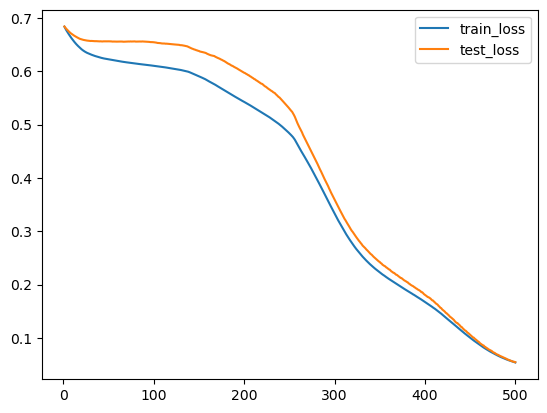

In [18]:
plt.plot(range(1,501),history.history["loss"],label="train_loss")
plt.plot(range(1,501),history.history["val_loss"],label="test_loss") 
plt.legend()

## Predicting the model

In [19]:
predicted=model.predict(x_test) 
predicted 

13/13 [==============================] - 0s 3ms/step


array([[1.66733369e-01],
       [8.38502288e-01],
       [9.97824490e-01],
       [3.43972184e-02],
       [3.20524909e-04],
       [5.02276514e-03],
       [8.58827773e-03],
       [9.61764812e-01],
       [9.11160767e-01],
       [3.91829684e-02],
       [9.99710679e-01],
       [9.97903168e-01],
       [9.98061299e-01],
       [1.28251435e-02],
       [2.04104349e-01],
       [9.99516964e-01],
       [6.42621471e-03],
       [7.41694449e-03],
       [8.76170337e-01],
       [9.93197620e-01],
       [9.61285889e-01],
       [6.79830983e-02],
       [3.26438411e-03],
       [3.15465208e-04],
       [1.56457648e-02],
       [9.97158527e-01],
       [6.31922126e-01],
       [2.75567710e-01],
       [3.24401748e-03],
       [9.98799682e-01],
       [9.97653246e-01],
       [9.94239032e-01],
       [9.97138679e-01],
       [9.99553978e-01],
       [1.94933578e-01],
       [7.57980347e-02],
       [4.93468810e-03],
       [6.90912008e-02],
       [1.63683109e-02],
       [3.53559703e-01],


In [20]:
predicted=np.where(predicted>0.5,1,0)
predicted  

array([[0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
    

## Evaluating the model

0.995


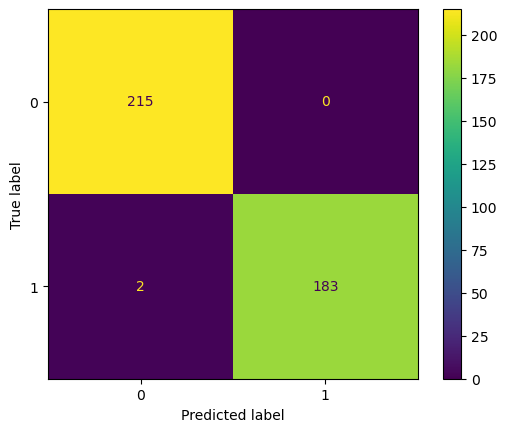

In [21]:
from sklearn.metrics import accuracy_score,confusion_matrix,ConfusionMatrixDisplay
print(accuracy_score(y_test,predicted))
cm=confusion_matrix(y_test,predicted)
va=ConfusionMatrixDisplay(cm)
va.plot() 
plt.show() 

## PLOTING THE DECISION SURFACE

In [22]:
from mlxtend.plotting  import plot_decision_regions  

9600/9600 [==============================] - 21s 2ms/step


<AxesSubplot:>

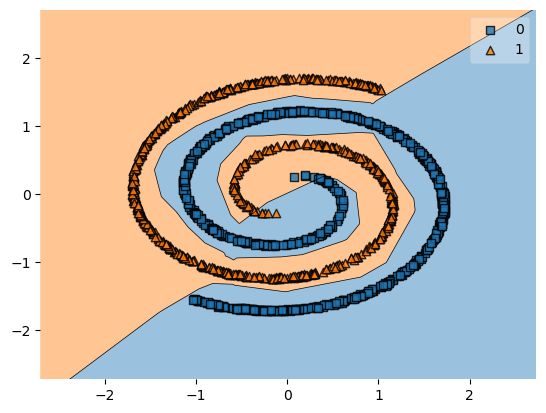

In [23]:
plot_decision_regions(x_train,y_train.values,clf=model) 

9600/9600 [==============================] - 22s 2ms/step


<AxesSubplot:>

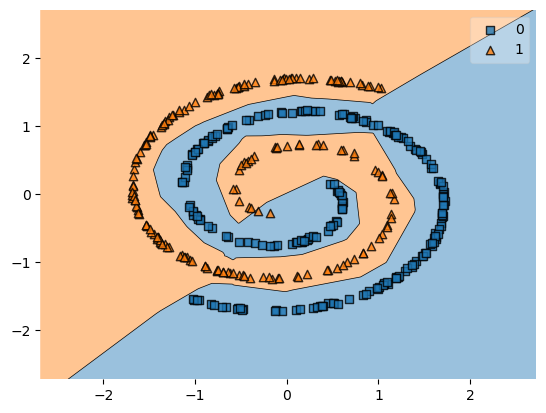

In [24]:
plot_decision_regions(x_test,y_test.values,clf=model)  

## Conclusions:

###### This neural network model achieves an accuracy of 99%. The model architecture consists of 3 hidden layers with the following specifications:

- 1st HL :- 16 neurons with the ReLU activation function.
- 2nd HL :- 10 neurons with the ReLU activation function.
- 3rn HL :- 6 neurons with the ReLU activation function.

###### The output layer uses the sigmoid activation function.

###### Loss function: Binary cross-entropy.
- Optimizer: Stochastic Gradient Descent (SGD) with a batch size of 10 and a learning rate of 0.01.
- The model was trained for 500 epochs.
 